In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('credit-risk-dataset.csv')
df.head(10)

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk
5,no_checking,32,outstanding_credit,vacation,9604,500_to_1000,greater_7,6,male,co-applicant,...,unknown,57,none,free,2,skilled,2,yes,yes,Risk
6,no_checking,9,prior_payments_delayed,car_new,1032,100_to_500,4_to_7,3,male,none,...,savings_insurance,41,none,own,1,management_self-employed,1,none,yes,No Risk
7,less_0,16,credits_paid_to_date,vacation,3109,less_100,4_to_7,3,female,none,...,car_other,36,none,own,2,skilled,1,none,yes,No Risk
8,0_to_200,11,credits_paid_to_date,car_new,4553,less_100,less_1,3,female,none,...,savings_insurance,22,none,own,1,management_self-employed,1,none,yes,No Risk
9,no_checking,35,outstanding_credit,appliances,7138,500_to_1000,greater_7,5,male,co-applicant,...,unknown,49,none,free,2,skilled,2,yes,yes,Risk


In [6]:
df.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [7]:
df['Risk'].value_counts()

Risk
No Risk    3330
Risk       1670
Name: count, dtype: int64

# One hot encoding

Output y

In [8]:
df['y'] = 0 
df.loc[df['Risk'] == 'Risk', 'y'] = 1
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,y
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,32,none,own,1,skilled,1,none,yes,No Risk,0
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,37,stores,own,2,skilled,1,none,yes,No Risk,0
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,28,none,own,2,skilled,1,yes,no,No Risk,0
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,32,none,own,1,skilled,1,none,yes,No Risk,0
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,57,none,own,2,skilled,1,none,yes,Risk,1


Credit History

In [9]:
# Label encoding 
encoder = LabelEncoder()

# One hot encoding
encoder2 = OneHotEncoder()


In [10]:
df['CreditHistory'].value_counts()

CreditHistory
prior_payments_delayed    1686
credits_paid_to_date      1490
outstanding_credit         938
all_credits_paid_back      769
no_credits                 117
Name: count, dtype: int64

In [11]:
CreditHistory_encoded = encoder2.fit_transform(df[['CreditHistory']]).toarray()

ExistingSavings

In [12]:
df['ExistingSavings'].value_counts()

ExistingSavings
less_100        1856
100_to_500      1133
500_to_1000     1078
greater_1000     558
unknown          375
Name: count, dtype: int64

In [13]:
ExistingSavings_encoded = encoder.fit_transform(df[['ExistingSavings']]).reshape(-1,1)

c:\Users\kathy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CheckingStatus

In [14]:
df['CheckingStatus'].value_counts()

CheckingStatus
no_checking    1993
less_0         1398
0_to_200       1304
greater_200     305
Name: count, dtype: int64

In [15]:
CheckingStatus_encoded = encoder.fit_transform(df[['CheckingStatus']]).reshape(-1,1)

c:\Users\kathy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Housing

In [16]:
df['Housing'].value_counts()

Housing
own     3195
rent    1066
free     739
Name: count, dtype: int64

In [17]:
Housing_encoded = encoder2.fit_transform(df[['Housing']]).toarray()

Job

In [18]:
df['Job'].value_counts()

Job
skilled                     3400
unskilled                    673
management_self-employed     641
unemployed                   286
Name: count, dtype: int64

In [19]:
Job_encoded = encoder2.fit_transform(df[['Job']]).toarray()

# Visualizations

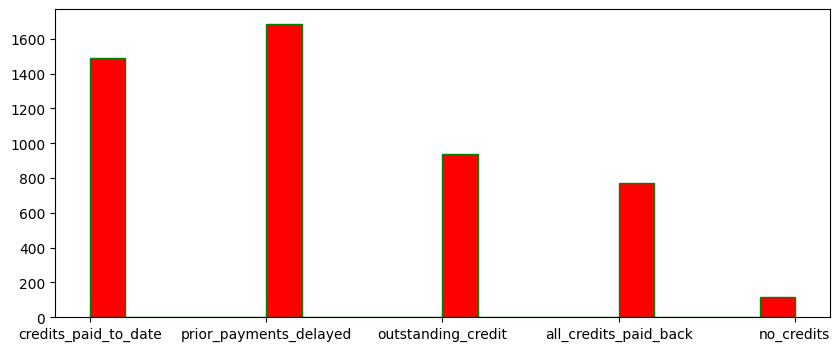

In [20]:
credit_history = df['CreditHistory']
plt.figure(figsize=(10,4))
plt.hist(credit_history, color = 'red' , edgecolor = 'green', bins=20)
plt.show()

# Convert Pandas dataframe to numpy arrays

In [21]:
df.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk', 'y'],
      dtype='object')

category: CheckingStatus_encoded, CreditHistory_encoded, ExistingSavings_encoded, Housing_encoded, Job_encoded
<br>
quant: 'LoanDuration', 'LoanAmount', 'Age'

In [22]:
numerical_features = df[['LoanDuration','LoanAmount', 'Age']].values 
X = np.concatenate([CheckingStatus_encoded, CreditHistory_encoded, ExistingSavings_encoded, Housing_encoded, Job_encoded, numerical_features], axis=1)
print(type(X))

<class 'numpy.ndarray'>


In [23]:
y = df['y'].values
print(type(y))

<class 'numpy.ndarray'>


# Normalization

In [24]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
X[0:10]

array([[-1.49834983, -0.42632584,  1.53483051, -0.15479238, -0.48054212,
        -0.71326766, -1.39179319, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928,  0.8607091 ,
        -0.63953186, -0.36932715],
       [ 0.15181518, -0.42632584,  1.53483051, -0.15479238, -0.48054212,
        -0.71326766,  0.86224458, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928, -0.30398521,
        -1.21308861,  0.10026795],
       [ 0.15181518, -0.42632584, -0.65153774, -0.15479238, -0.48054212,
         1.40199824,  0.86224458, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928, -0.57276082,
        -1.29829817, -0.74500323],
       [-1.49834983, -0.42632584,  1.53483051, -0.15479238, -0.48054212,
        -0.71326766,  0.86224458, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928,  0.59193349,
         0.0855532 

# Split data into training and testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 
print(f'Train set: {X_train.shape} , {y_train.shape}')
print(f'Test set: {X_test.shape} , {y_test.shape}')

Train set: (4000, 17) , (4000,)
Test set: (1000, 17) , (1000,)


# Model training

In [26]:
k = 3 
neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=3)


# Prediction

In [27]:
yhat = neigh.predict(X_test) 
yhat[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

# Evaluate accuracy

In [28]:
print(f'Train set accuracy: {metrics.accuracy_score(y_train, neigh.predict(X_train))}')
print(f'Test set accuracy: {metrics.accuracy_score(y_test, yhat)}')

Train set accuracy: 0.852
Test set accuracy: 0.72


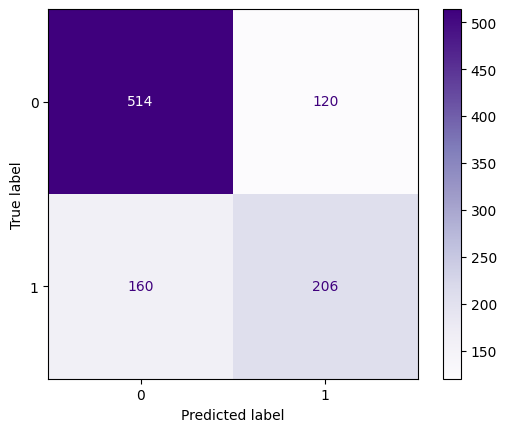

In [29]:
cm = confusion_matrix(y_test, yhat, labels = neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = neigh.classes_)
disp.plot(cmap = 'Purples')
plt.show()

C:\Users\kathy\AppData\Local\Temp\ipykernel_70720\197524958.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


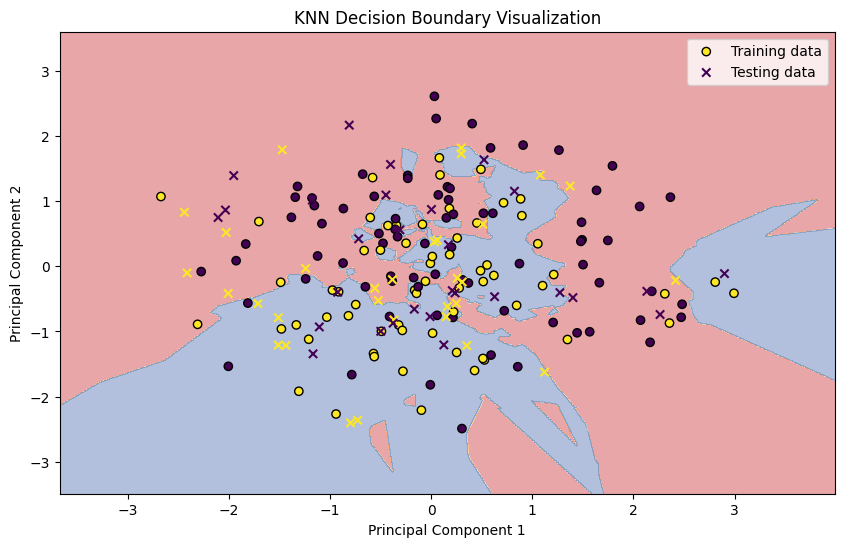

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

# Generating synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 5)  # 200 samples, 5 features
y = np.random.randint(2, size=200)  # Binary target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and the training/testing points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')

plt.title('KNN Decision Boundary Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

